# Pre-Lab ELN Averaging Traces to Make 4 Total Traces

### Name: Kylie Joyce


### Date: 03/22/2022


### PID: 730333803


### Jupyter Notebook Number: 8


## Purpose/Objective:
The purpose of this notebook is to average all traces made for one dataset (aka have 1 trace for male familiar experiments, not 51). We are hoping to get this average trace so that we have 4 individual traces, 1 per data set and then graph these traces appropriately so that we have 2 figure panels: one with both familiar traces (M and F) and one with both novel traces (M and F). 

## Protocol:
1. Import the Allen data.
2. Import the data set breakdown.
3. Run through all the code from last week.
4. Begin attempting to average all traces for each dataset into one and plot them.
5. Troubleshoot.
6. Hopefully come up with 4 individual traces. 

## Expected Results:
We expect to successfully build a singular trace per dataset and then create the 2 figure panels containing traces. Because this has proven to be a troubling task in previous attempts, we foresee this is all we will get done this lab. 

### Installing AllenSDK into your local environment. 

In [2]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [3]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [4]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [5]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

### Allen Brain Data

In [6]:
ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")

print(ophys_experiments.columns)

ophys_experiments.head(100)

Total number of ophys experiments: 1941

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'session_type', 'experience_level', 'passive',
       'image_set', 'file_id'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878358326,CAM2P.4,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,448900,Ai94(TITL-GCaMP6s),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,136.0,Slc17a7-IRES2-Cre,GCaMP6s,6.0,...,863992815,VisualBehavior,175,VISp,2019-05-30 17:29:35.000000,OPHYS_6_images_B,Novel >1,False,B,879255318
939327156,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,180.0,Slc17a7-IRES2-Cre,GCaMP6f,1.0,...,930022332,VisualBehavior,175,VISp,2019-09-04 15:26:03.000000,OPHYS_1_images_A,Familiar,False,A,939486362
940354166,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,181.0,Slc17a7-IRES2-Cre,GCaMP6f,2.0,...,930022332,VisualBehavior,175,VISp,2019-09-05 15:43:21.000000,OPHYS_2_images_A_passive,Familiar,True,A,940418592


### Datasets

#### Male Familiar

In [7]:
plsmales1 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales2 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsmales3 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales4 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# males familiar total is plsmales1 + plsmales2 + plsmales3 + plsmales4
plsmalesf = pd.concat([plsmales1, plsmales2], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales3], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales4], axis=0)
            
plsmalesf.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
961283857,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,174.0,Sst-IRES-Cre,GCaMP6f,2.0,...,957024596,VisualBehavior,290,VISp,2019-10-04 21:12:37.000000,OPHYS_2_images_A_passive,Familiar,True,A,961328900
1050720434,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,121.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1049224697,VisualBehavior,275,VISp,2020-09-15 18:01:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,1050776175
1081264133,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027847,VisualBehaviorMultiscope,306,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144562
1081264129,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027842,VisualBehaviorMultiscope,229,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144552
1007929142,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,495789,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1006071814,VisualBehavior,275,VISp,2020-02-17 16:45:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1007966514


In [8]:
new_mf = plsmalesf.index

#### Male Novel 

In [9]:
plsmales5 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales6 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsmales7 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales8 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# males novel total is plsmales5 + plsmales6 + plsmales7 + plsmales8

plsmalesn = pd.concat([plsmales5, plsmales6], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales7], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales8], axis=0)
            
plsmalesn.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
995622557,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,203.0,Sst-IRES-Cre,GCaMP6f,5.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-20 18:26:12.000000,OPHYS_5_images_A_passive,Novel >1,True,A,995659072
993593393,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,485688,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,5.0,...,989461845,VisualBehaviorTask1B,275,VISp,2019-12-10 17:38:29.000000,OPHYS_5_images_A_passive,Novel >1,True,A,993634306
982862427,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,477202,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,165.0,Sst-IRES-Cre,GCaMP6f,5.0,...,975371413,VisualBehaviorTask1B,275,VISp,2019-11-14 20:10:30.000000,OPHYS_5_images_A_passive,Novel >1,True,A,982976718
1012112426,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,498972,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,152.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1006386845,VisualBehaviorTask1B,275,VISp,2020-03-03 18:24:50.000000,OPHYS_5_images_A_passive,Novel >1,True,A,1012177053
1003456269,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489056,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,177.0,Sst-IRES-Cre,GCaMP6f,6.0,...,999191979,VisualBehaviorTask1B,275,VISp,2020-01-28 19:38:04.000000,OPHYS_5_images_A_passive,Novel >1,False,A,1003552807


In [10]:
new_mn = plsmalesn.index

#### Female Familiar

In [11]:
plsfemales1 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales2 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsfemales3 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales4 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# females familiar total is plsfemales1 + plsfemales2 + plsfemales3 + plsfemales4

plsfemalesf = pd.concat([plsfemales1, plsfemales2], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales3], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales4], axis=0)
            
plsfemalesf.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
953659743,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012706
953659745,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012793
956903375,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,150.0,Sst-IRES-Cre,GCaMP6f,2.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-09-26 17:34:33.000000,OPHYS_2_images_B_passive,Familiar,True,B,957356891
798404219,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,156.0,Vip-IRES-Cre,GCaMP6f,2.0,...,791352433,VisualBehavior,175,VISp,2018-12-18 23:26:29.000000,OPHYS_2_images_A_passive,Familiar,True,A,859888258
1066177684,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,538219,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,167.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1064333290,VisualBehavior,175,VISp,2020-11-25 16:08:44.000000,OPHYS_2_images_A_passive,Familiar,True,A,1066218438


In [12]:
new_ff = plsfemalesf.index

#### Female Novel

In [13]:
plsfemales5 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales6 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsfemales7 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales8 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# females novel total is plsfemales5 + plsfemales6 + plsfemales7 + plsfemales8

plsfemalesn = pd.concat([plsfemales5, plsfemales6], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales7], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales8], axis=0)
            
plsfemalesn.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
960351917,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,156.0,Sst-IRES-Cre,GCaMP6f,5.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-10-02 18:23:56.000000,OPHYS_5_images_A_passive,Novel >1,True,A,960425985
959388790,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012436
959388792,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012475
959388788,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012491
994053909,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,130.0,Vip-IRES-Cre,GCaMP6f,5.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-12 17:15:46.000000,OPHYS_5_images_A_passive,Novel >1,True,A,994100291


In [14]:
new_fn = plsfemalesn.index

### Creating dF/F traces

#### "Prefered magic functions for jupyter notebook"

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Check again how many sessions and format it

In [16]:
print('Number of male inhibitory familiar sessions = {}'.format(len(plsmalesf)))

Number of male inhibitory familiar sessions = 51


In [17]:
print('Number of male inhibitory novel sessions = {}'.format(len(plsmalesn)))

Number of male inhibitory novel sessions = 48


In [18]:
print('Number of female inhibitory familiar sessions = {}'.format(len(plsfemalesf)))

Number of female inhibitory familiar sessions = 11


In [19]:
print('Number of female inhibitory novel sessions = {}'.format(len(plsfemalesn)))

Number of female inhibitory novel sessions = 13


### Male Familiar Experiment 1

In [20]:
ophys_experiment_idmf = plsmalesf.index[0]

datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
ophys_experiment_idmf

961283857

In [21]:
datasetmf.dff_traces.head(10)

,cell_roi_id,dff
cell_specimen_id,,
1086490183,1080759213,"[0.5113319158554077, 0.24553748965263367, 0.52..."
1086490132,1080759218,"[0.6354167461395264, 0.4077703654766083, 0.340..."
1086490621,1080759227,"[0.5312566757202148, 0.4695289134979248, 0.305..."
1086490330,1080759231,"[0.7621955275535583, 0.5847464203834534, 0.430..."
1086490289,1080759234,"[0.9291403889656067, 0.8949682712554932, 0.692..."
1086490068,1080759244,"[0.4910393953323364, 0.5180848240852356, 0.446..."
1086490100,1080759250,"[0.5906590819358826, 0.5741793513298035, 0.327..."
1086489976,1080759256,"[1.2334561347961426, 0.8644771575927734, 1.110..."
1086490217,1080759270,"[2.720043420791626, 2.635056495666504, 2.64893..."


In [22]:
dff_arraymf = np.vstack(datasetmf.dff_traces.dff.values)
print('This array contrains dff traces from {} neurons and it is {} samples long.'.format(dff_arraymf.shape[0], dff_arraymf.shape[1]))

This array contrains dff traces from 14 neurons and it is 140132 samples long.


In [23]:
datasetmf.events.head(14)

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086490183,1080759213,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1394,0.095287
1086490132,1080759218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0799,0.072132
1086490621,1080759227,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0840,0.074836
1086490330,1080759231,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1078,0.084146
1086490289,1080759234,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1111,0.085036
1086490068,1080759244,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0537,0.059273
1086490100,1080759250,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1009,0.083218
1086489976,1080759256,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0981,0.079948
1086490217,1080759270,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1315,0.092532


In [24]:
datasetmf.ophys_timestamps

array([3.05580000e+00, 3.08810000e+00, 3.12040000e+00, ...,
       4.53119210e+03, 4.53122442e+03, 4.53125673e+03])

In [25]:
cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf = cell_specimen_idsmf[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf)) # print id

Cell specimen id mf = 1086490183


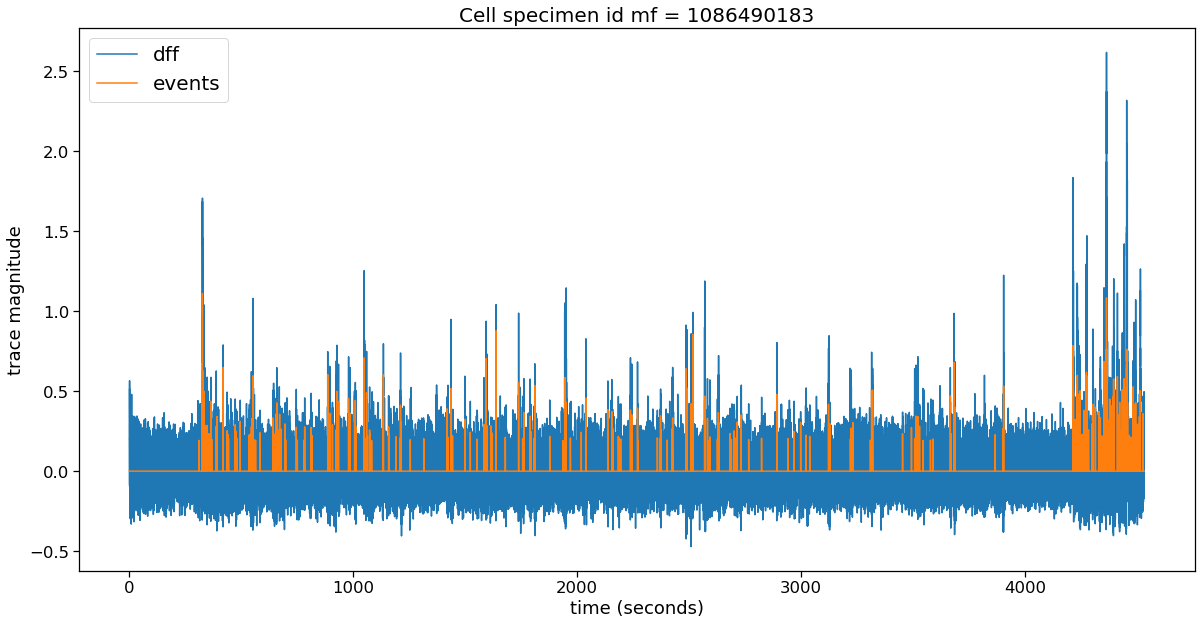

In [26]:
# plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell_specimen_idmf, 'dff'])
ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell_specimen_idmf, 'events'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('trace magnitude')
ax.set_title('Cell specimen id mf = {}'.format(cell_specimen_idmf), fontsize = 20)
ax.legend(['dff', 'events'], fontsize = 20)

In [27]:
len(cell_specimen_idsmf)

14

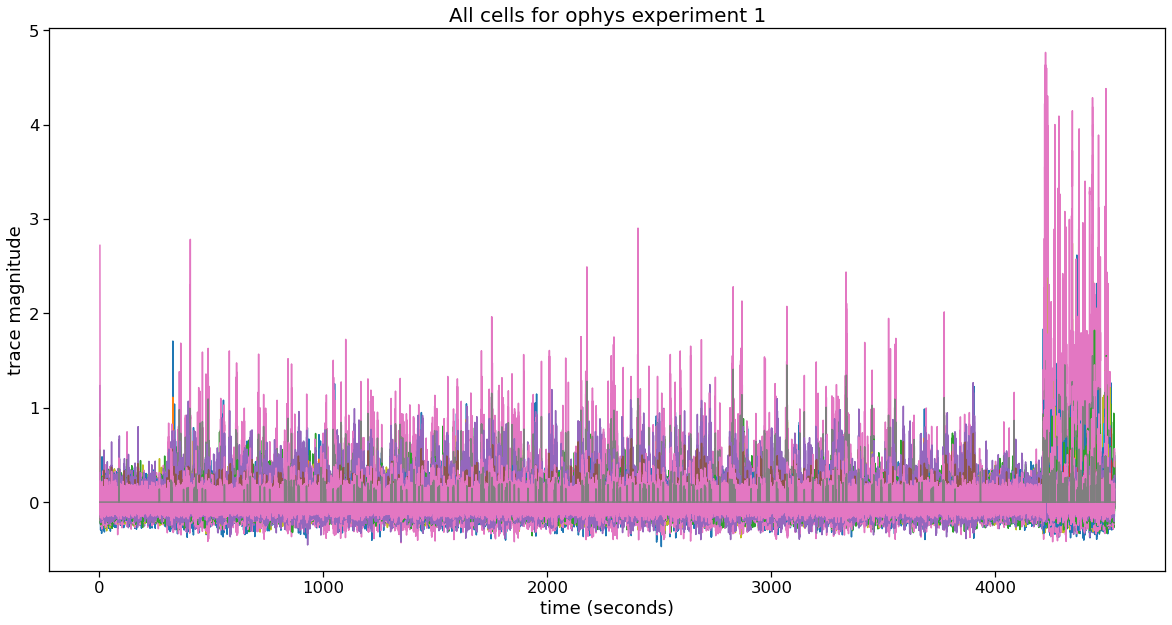

In [28]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf:
    ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 1', fontsize = 20)

### Male Familiar Experiment 2

In [29]:
ophys_experiment_idmf1 = plsmalesf.index[1]

datasetmf1 = cache.get_behavior_ophys_experiment(ophys_experiment_idmf1)
ophys_experiment_idmf1

1050720434

In [30]:
cell_specimen_idsmf1 = datasetmf1.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_idmf1 = cell_specimen_idsmf1[0] # let's pick 1st cell
print('Cell specimen id mf = {}'.format(cell_specimen_idmf1)) # print id

Cell specimen id mf = 1086611102


In [31]:
len(cell_specimen_idsmf1)

9

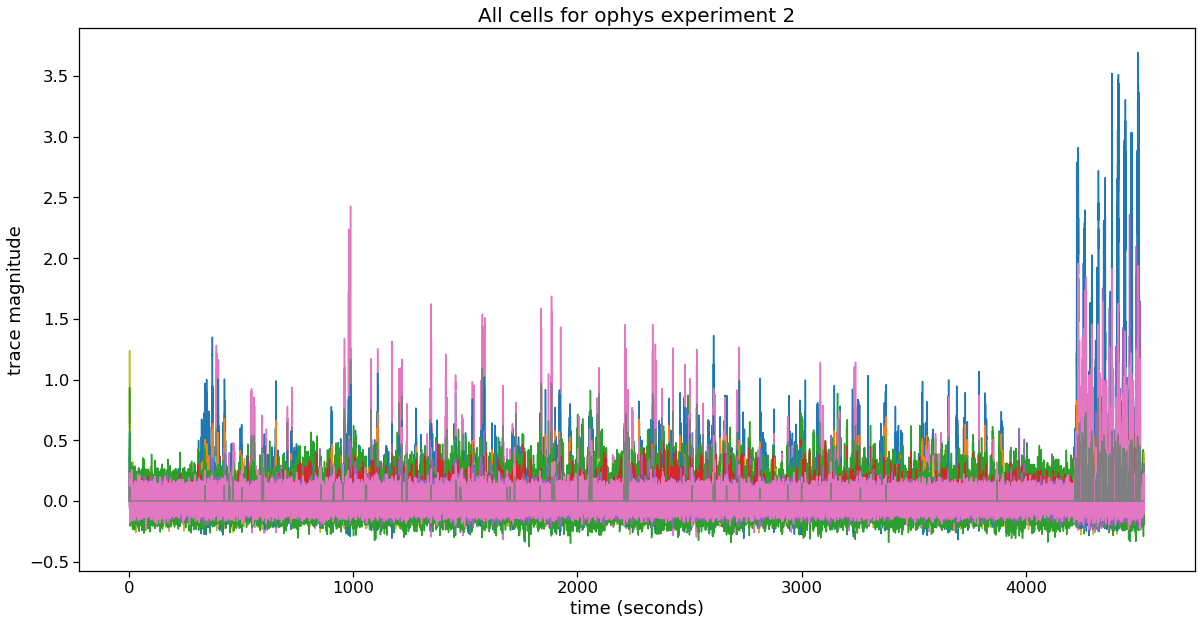

In [32]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
for cell in cell_specimen_idsmf1:
    ax.plot(datasetmf1.ophys_timestamps, datasetmf1.dff_traces.loc[cell, 'dff'])
    ax.plot(datasetmf1.ophys_timestamps, datasetmf1.events.loc[cell, 'events'])
    ax.set_xlabel('time (seconds)')
    ax.set_ylabel('trace magnitude')
    ax.set_title('All cells for ophys experiment 2', fontsize = 20)

### Above should show that different cells are being plotted and therefore the code is working to trace different cell activity

### All Female Novel Traces Laid on One Plot (to have the for loop here just in case)

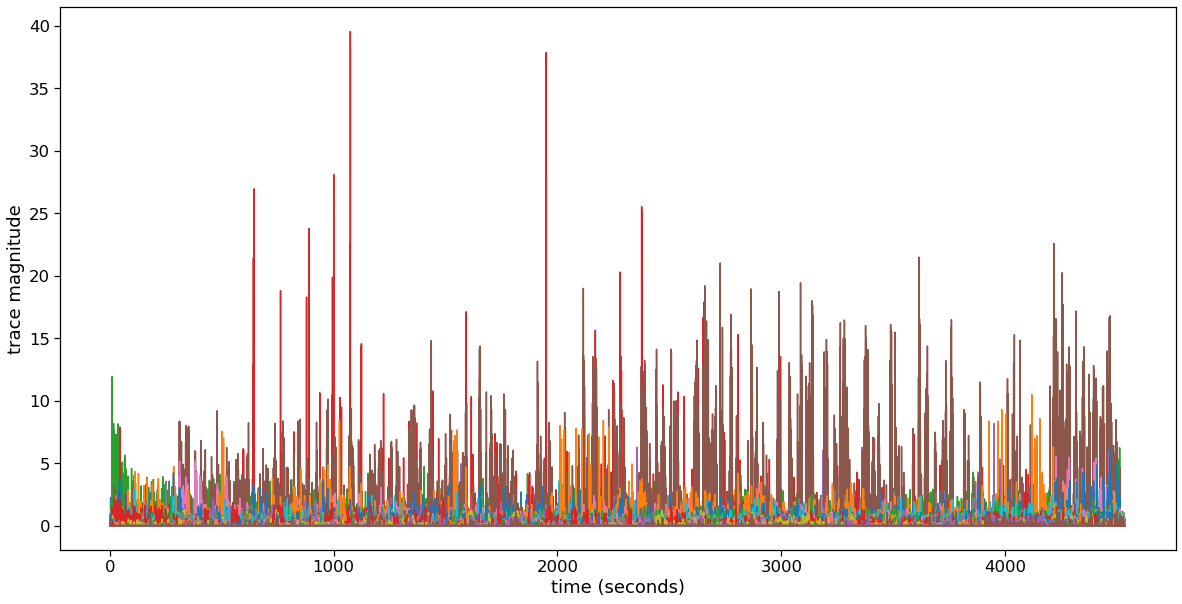

In [33]:
fig, ax =plt.subplots(1,1, figsize = (20,10))
for index in range(len(new_fn)):
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    for cell in cell_specimen_idsmf:
        #ax.plot(datasetmf.ophys_timestamps, datasetmf.dff_traces.loc[cell, 'dff'])
        ax.plot(datasetmf.ophys_timestamps, datasetmf.events.loc[cell, 'events'])
        ax.set_xlabel('time (seconds)')
        ax.set_ylabel('trace magnitude')
        #ax.set_title('All cells for ophys experiment 10', fontsize = 20)

Are events more important than the dff traces?

### An average trace of events of all cells for each experiment for females novel (to have the code present here)

No handles with labels found to put in legend.


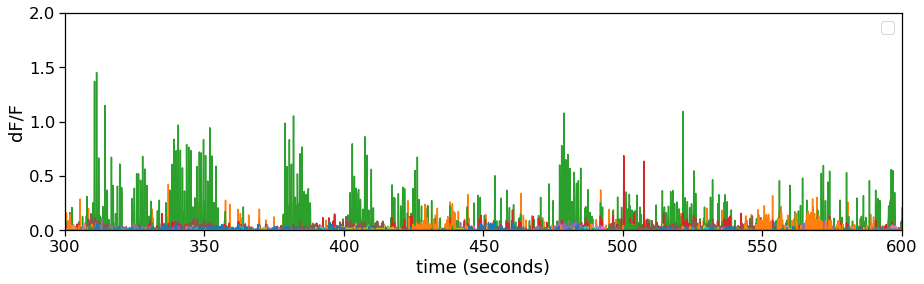

In [34]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_fn)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

### An average dFF trace of all cells for each experiment for female novel (to have the code)

No handles with labels found to put in legend.


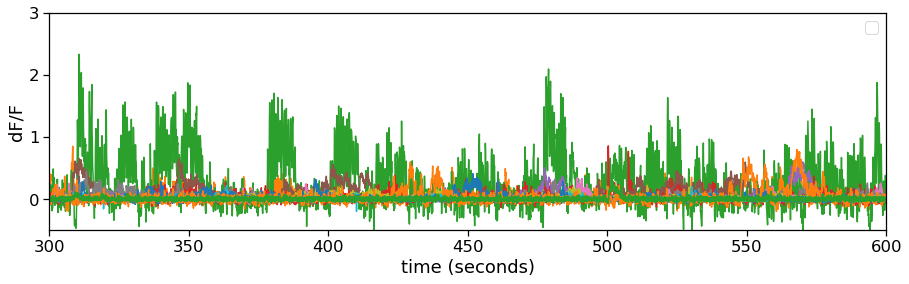

In [35]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(new_fn)): 
    # get the dataset object
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = datasetmf.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(-0.5,3)
ax.legend()

### Where do we move onto quantifying from here? 

In [36]:
### Hopefully fill in after discussing with Dr. Penton

#### Attempting to average all male familiar experiment traces into 1 trace

In [ ]:
all_male_fam = []

for index in range(len(new_mf)):
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    all_male_fam.append(average_dFFevents)
    

In [58]:
tot_male_fam = {}
mf_time = datasetmf.ophys_timestamps

print(len(mf_time))
print(len(all_male_fam))
print(len(all_male_fam[1]))

for i in range(len(mf_time)):
    tot_male_fam[mf_time[i]] = all_male_fam[i]
    
tot_male_fam = pd.DataFrame(tot_male_fam)
tot_male_fam

140004
7
140024


IndexError: list index out of range

In [38]:
len(all_male_fam)

51

In [39]:
all_male_fam.head()

,0,1,2,3,4,5,6,7,8,9,...,140294,140295,140296,140297,140298,140299,140300,140301,140302,140303
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.063953,0.041217,0.0,0.0,0.0,0.0,0.059917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(all_male_fam)): 
    # get the dataset object
    ophys_experiment_idmf = all_male_fam[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

#### Attempting to average all male novel experiment traces into 1 trace

In [ ]:
all_male_nov = []

for index in range(len(new_mn)):
    ophys_experiment_idmf = plsmalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    all_male_nov.append(average_dFFevents)
    
all_male_nov = pd.DataFrame(all_male_nov)

In [ ]:
len(all_male_nov)

In [ ]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(all_male_nov)): 
    # get the dataset object
    ophys_experiment_idmf = all_male_nov[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

#### Attempting to average all female familiar experiments into 1 trace

In [ ]:
all_female_fam = []

for index in range(len(new_ff)):
    ophys_experiment_idmf = plsfemalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    all_female_fam.append(average_dFFevents)
    
all_female_fam = pd.DataFrame(all_female_fam)

In [ ]:
len(all_female_fam)

In [ ]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(all_female_fam)): 
    # get the dataset object
    ophys_experiment_idmf = all_female_fam[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

#### Attempting to averagae all female novel experiments into 1 trace

In [ ]:
all_female_nov = []

for index in range(len(new_fn)):
    ophys_experiment_idmf = plsfemalesn.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    all_female_nov.append(average_dFFevents)
    
all_female_nov = pd.DataFrame(all_female_nov)

In [ ]:
len(all_female_nov)

In [ ]:
# create figure axis
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for index in range(len(all_female_nov)): 
    # get the dataset object
    ophys_experiment_idmf = all_female_nov[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    # get ophys timestamps
    ophys_timestamps = datasetmf.ophys_timestamps
    # get the population average dF/F trace
    dff_events = datasetmf.events
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_events = np.vstack(dff_events.events)
    # take the mean over the cell axis
    average_dFFevents = np.mean(dff_events, axis=0)
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFFevents)
    #ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend()

## Resources:
https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_ophys_data_access.html
https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_ophys_dataset_manifest.html
https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_load_ophys_data.html

### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html
https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html

